### 方法:
1.正则化；
2.集成模型；
3.寻找最优超参数:XBGrid - 也可以用以下的方法
4.寻找最优参数： 粒子度算法/遗传算法 - 启发式优化算法
5.进行评估 - 可视化训练过程




文件处理 - 标准化 - 集成模型进行分析/ 正则化处理 - 交叉验证超参数 / 超参数优化 -评估

## Load the Package

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

! pip install xgboost
from xgboost import XGBClassifier as xgb
from sklearn.model_selection import GridSearchCV,cross_val_score

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset from the File 

In [6]:
#visulize the dadaset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


#format the dataset
Y_train = train_data['target']
X_train = train_data.drop(['id', 'target'],axis = 1)


X_test = test_data.drop(['id'], axis= 1)



In [3]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,-0.012,2.198,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,-1.199,0.466,-0.908,2.771,1.631,0.931,0.182,-0.652,-0.512,0.400,...,0.724,0.177,-0.039,0.759,0.461,-0.243,0.525,0.281,-0.255,-1.136
246,0.237,0.233,-0.380,-1.748,0.839,-0.721,-0.114,0.005,-1.788,1.416,...,0.857,0.147,0.601,-0.210,-0.768,1.004,-0.979,0.007,0.112,-0.558
247,1.411,-1.465,0.119,0.583,1.634,-0.207,1.173,1.622,-0.071,-0.695,...,-0.499,-0.455,0.759,0.222,0.105,-0.727,0.461,0.760,0.168,-0.719
248,0.620,1.040,0.184,-0.570,-0.087,-0.748,-1.559,-0.553,0.552,1.284,...,0.557,-1.494,0.977,0.882,-1.512,0.478,-0.910,-0.805,2.029,-0.423


In [7]:
Y_train

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
245    0.0
246    0.0
247    0.0
248    1.0
249    0.0
Name: target, Length: 250, dtype: float64

### Standard the Dataset

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [9]:
X_train_scaled

array([[-0.12173567,  2.17600225,  0.5036917 , ..., -0.42172402,
         1.02241106, -0.96572011],
       [ 1.06157697, -0.93927777, -0.53978988, ..., -1.1087964 ,
        -0.93965825,  1.13688315],
       [-0.54829027, -0.06167818, -0.50546483, ..., -0.00245942,
         0.78584951, -1.11634821],
       ...,
       [ 1.39278408, -1.42771556, -0.04747057, ...,  0.75582776,
         0.15766927, -0.60875213],
       [ 0.59889069,  1.05914755,  0.01627596, ..., -0.81390694,
         2.00742153, -0.30336913],
       [ 0.46741151,  0.42675961, -0.02785625, ..., -1.46487041,
        -0.63053791,  1.65376453]])

### Model Buiding： Ensemble Learning 

In [10]:
# 初始化XGBoost模型
xgb_model = xgb(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, Y_train)



# 获取特征重要性
feature_importances = xgb_model.feature_importances_
# 获取特征名
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 按重要性排序，并选择前150个
top_features = importance_df.sort_values(by='Importance', ascending=False).head(150)['Feature']

In [8]:
# 使用SelectFromModel选择特征

selector = SelectFromModel(xgb_model, max_features=150, prefit=True)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

KeyboardInterrupt: 

In [13]:
# 使用选定的特征重新训练模型
xgb_model_selected = xgb(use_label_encoder=False, eval_metric='logloss')
xgb_model_selected.fit(X_train_selected, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

### Hyperparameter optimization

In [11]:
#重新初始化
xgb_model_selected = xgb(use_label_encoder=False, eval_metric='logloss')

# 定义超参数网格
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 使用GridSearchCV进行超参数优化
grid_search_selected = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_selected.fit(X_train_scaled, Y_train)

# 输出最佳参数
print(f"最佳参数：{grid_search_selected.best_params_}")
print(f"最高准确率：{grid_search_selected.best_score_:.4f}")

最佳参数：{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
最高准确率：0.7240


In [14]:
# 使用最佳参数在测试集上评估模型

X_train_selected = X_train[top_features]
X_test_selected = test_data[top_features]

best_model_selected = grid_search_selected.best_estimator_

best_model_selected.fit(X_train_selected, Y_train)


#Y_pred_selected = best_model_selected.predict(X_test_selected)

Y_pred_selected_T = best_model_selected.predict(X_train_selected)
#best_model_selected = grid_search_selected.best_estimator_
#Y_pred_selected = best_model_selected.predict(X_test_selected)
scores = cross_val_score(best_model_selected, X_train_selected, Y_pred_selected_T, cv=5, scoring='accuracy')

#print(f"准确率: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
print(f"测试集准确率: {accuracy_score(Y_train, Y_pred_selected_T):.4f}")
#print(f"测试集准确率: {accuracy_score(Y_test, Y_pred_selected):.4f}")

测试集准确率: 1.0000


### Result evaluation

accuracy: 1.0000
precision: 1.0000
recall: 1.0000
f1: 1.0000
ROC-AUC: 1.0000


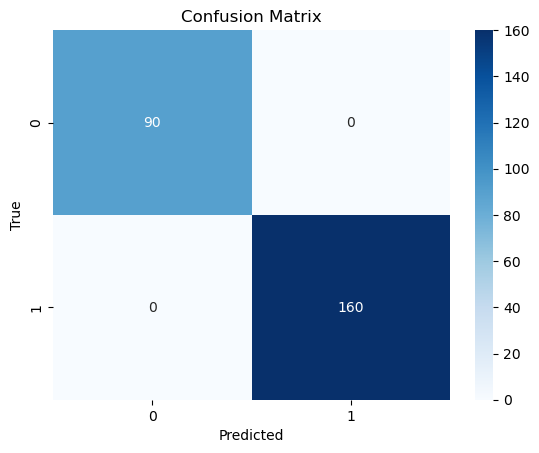

In [13]:

accuracy = accuracy_score(Y_train, Y_pred_selected_T)
precision = precision_score(Y_train, Y_pred_selected_T)
recall = recall_score(Y_train, Y_pred_selected_T)
f1 = f1_score(Y_train, Y_pred_selected_T)
roc_auc = roc_auc_score(Y_train, Y_pred_selected_T)

print(f'accuracy: {accuracy:.4f}')
print(f'precision: {precision:.4f}')
print(f'recall: {recall:.4f}')
print(f'f1: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')


cm = confusion_matrix(Y_train, Y_pred_selected_T)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Generate Submission

In [ ]:
# 创建一个新的DataFrame用于保存提交文件
submission = pd.DataFrame({
    'id': test_data['id'],
    'target': Y_pred
})

# 将DataFrame写入CSV文件，不保存索引
submission.to_csv('submission.csv', index=False)

print(submission.head(150))